## IMSA-NUIST Training-2023 (ekwacu@gmail.com) 

### Script-wind speed and direction plot-climatology

In [1]:
# Import existing code modules
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#uploaded.keys()
home_dir = 'D:/Folder_2023/Research/' ## read in the data
data_dir ='Africa_Research/sst/ERA5_WIND/'
ds1 = xr.open_dataset(home_dir + data_dir + 'ERA5_wind_850hpa_1961-2021_monthly.nc')  ##input file
#ds1

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
obs_clim = ds1.sel(time=slice("1961-01-16", "2021-12-16"))

In [4]:
####For seasonal analysis
obs_seas = obs_clim.groupby('time.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('time')
obs_mam = obs_seas['MAM'].mean('time')
obs_jja = obs_seas['JJA'].mean('time')
obs_son = obs_seas['SON'].mean('time')
#obs_son

In [5]:
Data_seas = obs_clim.groupby('time.season')   ##Group data into seasonal means for seasonal trends
#Data_seas
d2 = Data_seas['DJF']
d3 = Data_seas['MAM']
d4 = Data_seas['JJA']
d5 = Data_seas['SON']

In [6]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
d6=obs_yrs

In [7]:
#Make an average of the wind variables

#For SON
wspd_son = np.mean(np.sqrt(np.add(np.square(d4.u),np.square(d4.v))),axis=0)
u_son = np.mean(d4.u,axis=0)
v_son = np.mean(d4.v,axis=0)
#u_son

In [8]:
#setting up the quiver arguments (these display the wind vectors on the plot)
xx_son = wspd_son.longitude.values
yy_son = wspd_son.latitude.values
X_son,Y_son =np.meshgrid(xx_son, yy_son)
U_son = u_son.data
V_son = v_son.data

C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Samuel-NUIST\anaconda3\lib\site-packages\cartopy\crs.py:402: Shapel

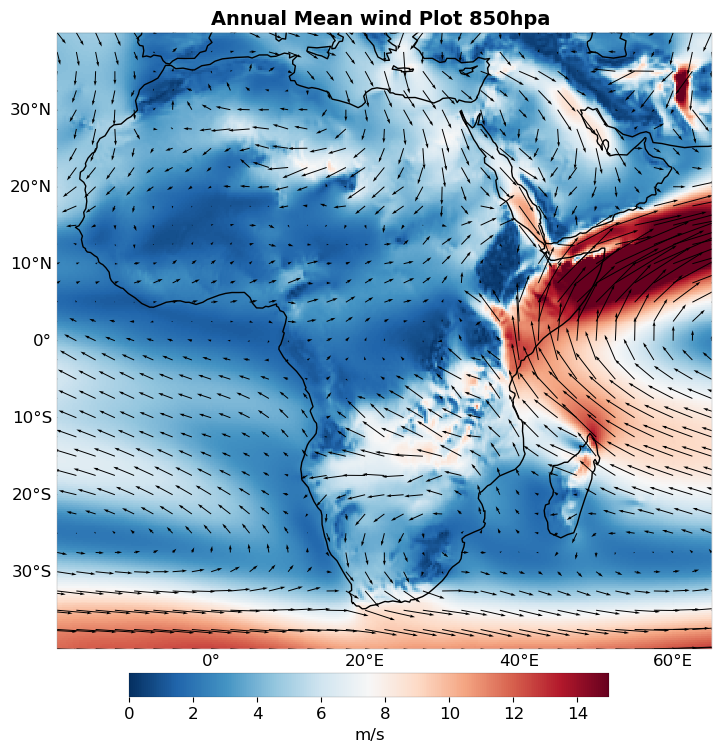

In [9]:
#Plot out the figures
fig=plt.figure(figsize=(12, 8), dpi=100)
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 0.1
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree())
speed_plot = plt.pcolormesh(wspd_son['longitude'], wspd_son['latitude'], wspd_son, cmap='RdBu_r',
               vmin=0, vmax=15)
plt.quiver(X_son[::10, ::10], Y_son[::10, ::10], U_son[::10, ::10], V_son[::10, ::10], 
           transform=ccrs.PlateCarree(), color='k', scale=180, width=0.0015,)
#lakes_10m = cfeature.NaturalEarthFeature('physical','lakes','10m')
#ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
#ax.add_feature(lakes_10m, facecolor='none', edgecolor='k')
plt.xlim([-20, 65])
plt.ylim([-40, 40])
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.title('Annual Mean wind Plot 850hpa ',fontsize=14, fontweight='bold')
colorbar_axes = plt.gcf().add_axes([0.3, 0.05, 0.4, 0.03])
plt.colorbar(speed_plot, colorbar_axes, label='m/s', orientation='horizontal')
#plt.text(0.08, 0.36, 'ERA5 (600 hPa)',fontsize=14,fontweight='bold', rotation='vertical',
#         transform=plt.gcf().transFigure)
# save output
plt.savefig('C:/ERSSTv5/Annual_ERA5-wind.png')
plt.show()

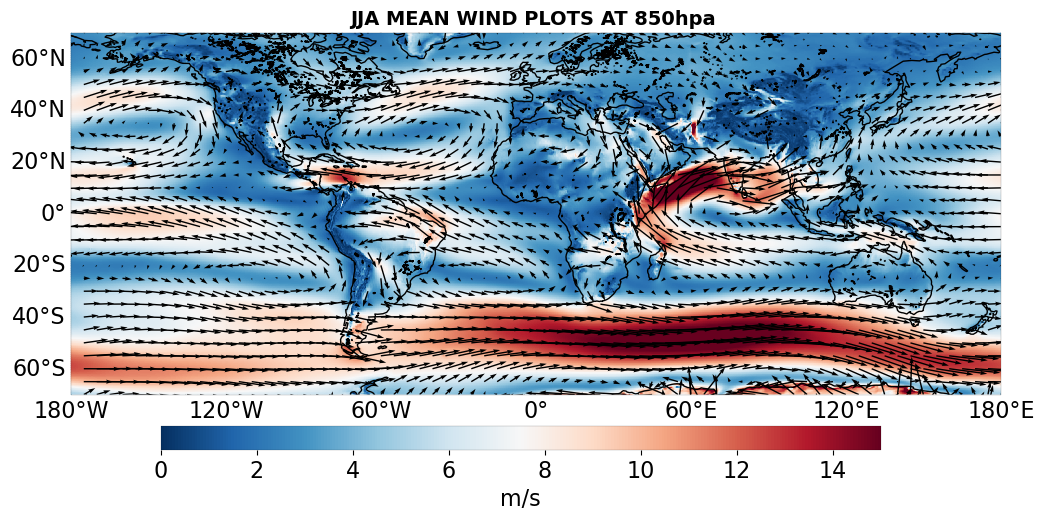

In [11]:
#Plot out the figures
fig=plt.figure(figsize=(12, 8), dpi=100)
mpl.rcParams['font.family'] #= 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0.1
plt.gcf().subplots_adjust(hspace=0, wspace=0.08)
ax = plt.subplot(projection=ccrs.PlateCarree())
speed_plot = plt.pcolormesh(wspd_son['longitude'], wspd_son['latitude'], wspd_son, cmap='RdBu_r',
               vmin=0, vmax=15)
plt.quiver(X_son[::20, ::20], Y_son[::20, ::20], U_son[::20, ::20], V_son[::20, ::20], 
           transform=ccrs.PlateCarree(), color='k', scale=300, width=0.0015,)
lakes_10m = cfeature.NaturalEarthFeature('physical','lakes','10m')
#ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(lakes_10m, facecolor='none', edgecolor='k')
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.01, linestyle='--')
gl.xlabels_top = False; gl.ylabels_left = True; gl.ylabels_right=False; gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
plt.xlim([-180, 180])
plt.ylim([-70, 70])
plt.title('JJA MEAN WIND PLOTS AT 850hpa ',fontsize=14, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
colorbar_axes = plt.gcf().add_axes([0.2, 0.2, 0.6, 0.03])
plt.colorbar(speed_plot, colorbar_axes, label='m/s', orientation='horizontal')
#plt.savefig(home_dir + plot_dir + 'Uganda_ERA5-wind.png')
plt.show()

## God's Favorite 